In [1]:
import random
import numpy
import math

from deap import base
from deap import creator
from deap import tools
from deap import algorithms

import matplotlib.pyplot as plt

from deap import benchmarks

C:\Users\Péricles\Anaconda3\lib\site-packages\deap\tools\_hypervolume\pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)


In [2]:
creator.create("FitnessMax", base.Fitness, weights=(1.0, 1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

In [3]:
toolbox = base.Toolbox()
# Attribute generator 
toolbox.register("attr", random.uniform, 0, 1)
# Structure initializers
toolbox.register("individual", tools.initRepeat, creator.Individual, 
    toolbox.attr, 10)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [4]:
toolbox.register("evaluate", benchmarks.zdt6)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, indpb=0.05, mu=0.5, sigma=0.2)
toolbox.register("select", tools.selNSGA2)

In [5]:
def main():
    random.seed(64)
    
    NGEN = 500
    MU = 100
    LAMBDA = 100
    CXPB = 0.7
    MUTPB = 0.2
    
    pop = toolbox.population(n=MU)
    hof = tools.ParetoFront()
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean, axis=0)
    stats.register("std", numpy.std, axis=0)
    stats.register("min", numpy.min, axis=0)
    stats.register("max", numpy.max, axis=0)
    
    algorithms.eaMuPlusLambda(pop, toolbox, MU, LAMBDA, CXPB, MUTPB, NGEN, stats,
                              halloffame=hof, verbose=False)
    
    return pop, stats, hof

In [6]:
def plot_pareto(population):
    
    x_values = []
    y_values = []
    
    for individual in population:
        fitnesses = toolbox.evaluate(individual)
        
        x_values.append(fitnesses[0])
        y_values.append(fitnesses[1])
    
    
    plt.plot(x_values, y_values, '.')
    #plt.yscale('log')
    plt.ylabel('Fit2')
    plt.xlabel('Fit1')
    plt.show()

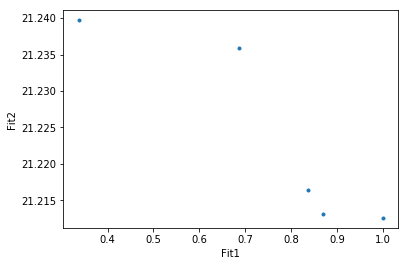

In [7]:
if __name__ == "__main__":
    results = main()
    
    #print(results[2])
    
    plot_pareto(results[2])
    